## 引入库

In [1]:
import os
import librosa
from sklearn.preprocessing import scale
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

## 转换为梅尔频谱图

In [2]:
def save_melspectrogram(file_name, file_path, sampling_rate=44100):
    """ Will save spectogram into current directory"""
    
    data, sr = librosa.load(file_path, sr=sampling_rate, mono=True)
    data = scale(data)

    melspec = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128)
    # Convert to log scale (dB) using the peak power (max) as reference
        # per suggestion from Librbosa: https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html
    log_melspec = librosa.power_to_db(melspec, ref=np.max)  
    librosa.display.specshow(log_melspec, sr=sr)
    
    # create saving directory
    directory = './melspectrograms'
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    plt.savefig(directory + '/' + file_name.strip('.wav') + '.png')

## 测试

E:\Python\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


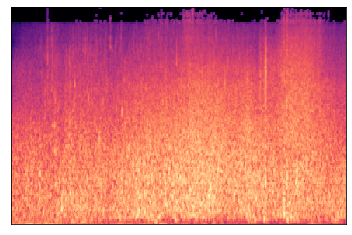

In [3]:
save_melspectrogram('4-167063-A-11.wav', './test_data/4-167063-A-11.wav') # 第一个参数是文件名字，第二个参数是文件path